In [26]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Загружаем 10k наиболее частых слов
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

print("Train shape:", x_train.shape, y_train.shape)
print("Test shape:", x_test.shape, y_test.shape)
print("Пример отзыва (в виде индексов):", x_train[0][:20])
print("Метка:", y_train[0])



17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (25000,) (25000,)
Test shape: (25000,) (25000,)
Пример отзыва (в виде индексов): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25]
Метка: 1


In [27]:
maxlen = 200  # максимальная длина отзыва
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

print("После паддинга:", x_train.shape)


После паддинга: (25000, 200)


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=maxlen),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 88s 273ms/step - accuracy: 0.6823 - loss: 0.5683 - val_accuracy: 0.8568 - val_loss: 0.3328
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 135s 250ms/step - accuracy: 0.9034 - loss: 0.2499 - val_accuracy: 0.8722 - val_loss: 0.3039
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 84s 255ms/step - accuracy: 0.9067 - loss: 0.2299 - val_accuracy: 0.8738 - val_loss: 0.3172
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 79s 254ms/step - accuracy: 0.9423 - loss: 0.1664 - val_accuracy: 0.8640 - val_loss: 0.3367
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 85s 270ms/step - accuracy: 0.9645 - loss: 0.1022 - val_accuracy: 0.8678 - val_loss: 0.3802


In [30]:
from tensorflow.keras.layers import GRU

model_gru = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=maxlen),
    GRU(64),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model_gru.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history_gru = model_gru.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 93s 288ms/step - accuracy: 0.6756 - loss: 0.5684 - val_accuracy: 0.8452 - val_loss: 0.3675
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 141s 286ms/step - accuracy: 0.8966 - loss: 0.2658 - val_accuracy: 0.8218 - val_loss: 0.3991
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 89s 284ms/step - accuracy: 0.9241 - loss: 0.2008 - val_accuracy: 0.8730 - val_loss: 0.3215
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 142s 286ms/step - accuracy: 0.9632 - loss: 0.1141 - val_accuracy: 0.8694 - val_loss: 0.3419
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 136s 266ms/step - accuracy: 0.9770 - loss: 0.0756 - val_accuracy: 0.8668 - val_loss: 0.4112


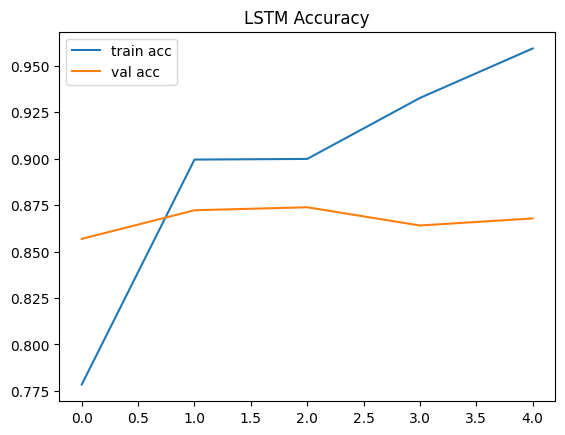

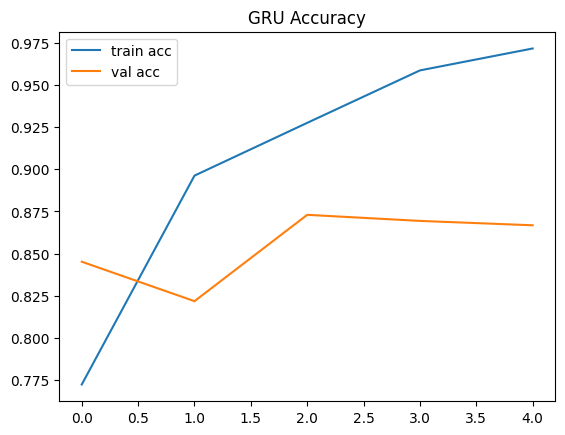

In [32]:
import matplotlib.pyplot as plt

def plot_history(history, title="Model"):
    plt.plot(history.history["accuracy"], label="train acc")
    plt.plot(history.history["val_accuracy"], label="val acc")
    plt.title(f"{title} Accuracy")
    plt.legend()
    plt.show()

plot_history(history, "LSTM")
plot_history(history_gru, "GRU")
